In [103]:
import pandas as pd
import numpy as np

import math

from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler, robust_scale

In [104]:
simple_df = pd.DataFrame({
    'students': ['Alice', 'Bob', 'Charlie', 'Dory', 'Emily'],
    'scores': [40, 42, 45, 48, 50]
})

In [105]:
simple_df.head()

,students,scores
0,Alice,40
1,Bob,42
2,Charlie,45
3,Dory,48
4,Emily,50


In [106]:
simple_df.describe()

,scores
count,5.000000
mean,45.000000
std,4.123106
min,40.000000
25%,42.000000
50%,45.000000
75%,48.000000
max,50.000000


In [109]:
simple_df['scores'] = simple_df['scores'].astype(np.float64)

In [111]:
simple_df['scaled_scores'] = scale(simple_df['scores'])

In [112]:
simple_df.describe()

,scores,scaled_scores
count,5.000000,5.000000e+00
mean,45.000000,4.440892e-17
std,4.123106,1.118034e+00
min,40.000000,-1.355815e+00
25%,42.000000,-8.134892e-01
50%,45.000000,0.000000e+00
75%,48.000000,8.134892e-01
max,50.000000,1.355815e+00


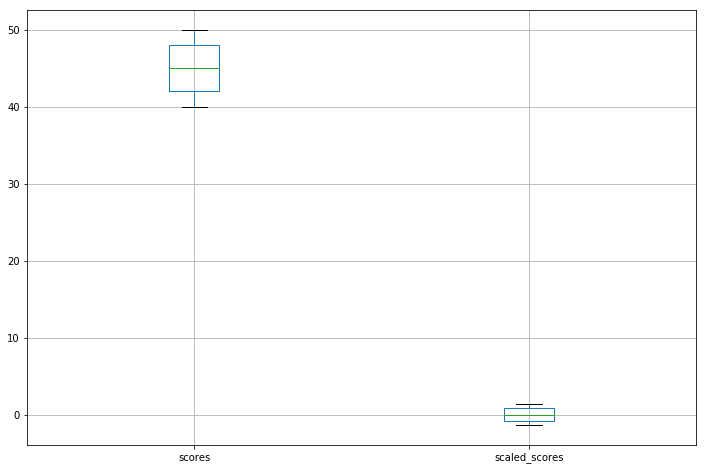

In [113]:
simple_df.boxplot(figsize=(12, 8))

In [114]:
def robust_scale_manual(x, median, q25, q75):
    
    scaled = (x - median) / (q75 - q25)
    
    return scaled

In [115]:
median = simple_df['scores'].median()

q25 = simple_df['scores'].quantile(q=0.25)

q75 = simple_df['scores'].quantile(q=0.75)

In [116]:
simple_df['robust_scaled_scores'] = simple_df['scores']. \
    apply(lambda x : robust_scale_manual(x, median, q25, q75))

In [117]:
simple_df.head()

,students,scores,scaled_scores,robust_scaled_scores
0,Alice,40.0,-1.355815,-0.833333
1,Bob,42.0,-0.813489,-0.500000
2,Charlie,45.0,0.000000,0.000000
3,Dory,48.0,0.813489,0.500000
4,Emily,50.0,1.355815,0.833333


In [118]:
new_df = pd.DataFrame({
    'students': ['Outlier'],
    'scores': [100]
})

In [119]:
simple_df = simple_df.append(new_df, sort=False)

In [120]:
simple_df['scaled_scores'] = scale(simple_df['scores'])

In [121]:
median = simple_df['scores'].median()

q25 = simple_df['scores'].quantile(q=0.25)

q75 = simple_df['scores'].quantile(q=0.75)

simple_df['robust_scaled_scores'] = simple_df['scores']. \
    apply(lambda x : robust_scale_manual(x, median, q25, q75))

In [122]:
simple_df

,students,scores,scaled_scores,robust_scaled_scores
0,Alice,40.0,-0.682011,-0.962963
1,Bob,42.0,-0.585727,-0.666667
2,Charlie,45.0,-0.441301,-0.222222
3,Dory,48.0,-0.296875,0.222222
4,Emily,50.0,-0.200591,0.518519
0,Outlier,100.0,2.206506,7.925926


### Absenteeism dataset

In [123]:
df = pd.read_csv('Datasets/absenteeism_processed.csv')

In [124]:
df.head()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
0,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,4.0
1,118.0,13.0,18.0,50.0,239.554,98.0,178.0,31.0,0.0
2,179.0,51.0,18.0,38.0,239.554,89.0,170.0,31.0,2.0
3,279.0,5.0,14.0,39.0,239.554,68.0,168.0,24.0,4.0
4,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,2.0


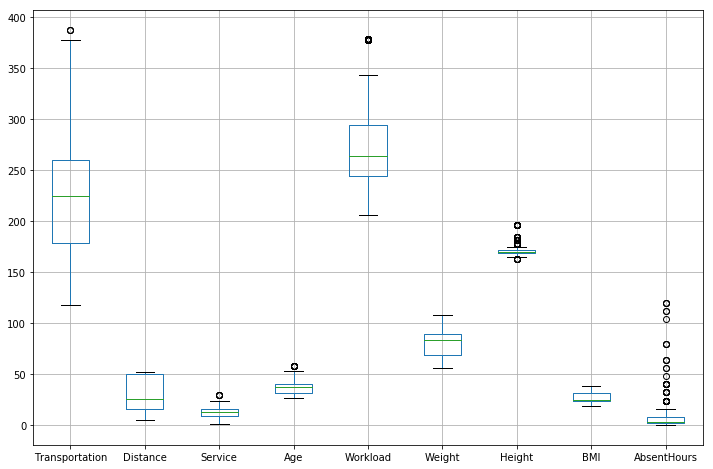

In [125]:
df.boxplot(figsize=(12, 8))

In [126]:
scaled_df = pd.DataFrame(scale(df), columns=df.columns)

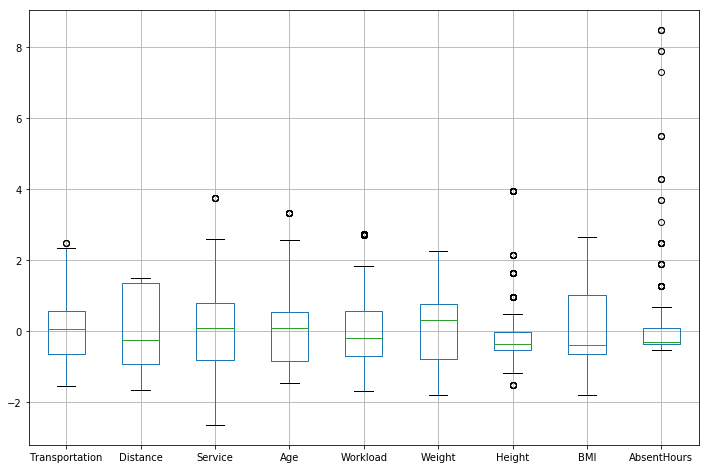

In [128]:
scaled_df.boxplot(figsize=(12, 8))

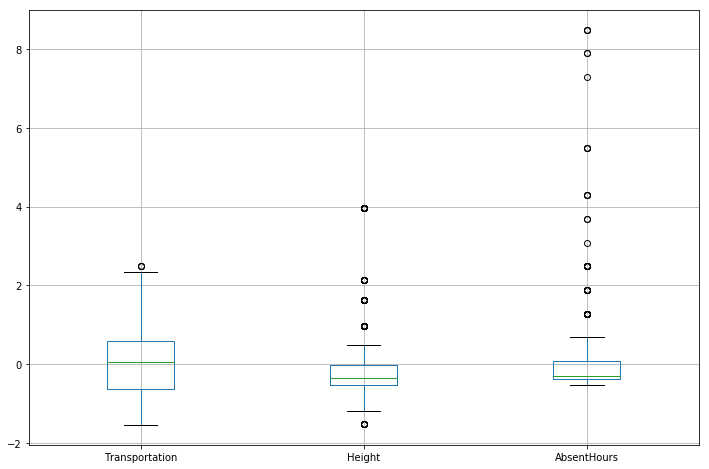

In [129]:
scaled_df.boxplot(column=['Transportation', 'Height', 'AbsentHours'], figsize=(12, 8))

In [130]:
scaled_df['Robust_Workload'] = robust_scale(df['Workload'])

scaled_df['Robust_Height'] = robust_scale(df['Height'])

scaled_df['Robust_AbsentHours'] = robust_scale(df['AbsentHours'])

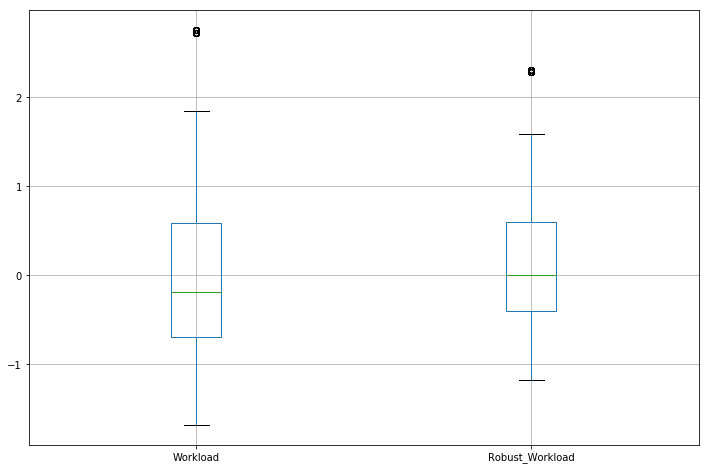

In [131]:
scaled_df.boxplot(column=['Workload', 'Robust_Workload'], figsize=(12, 8))

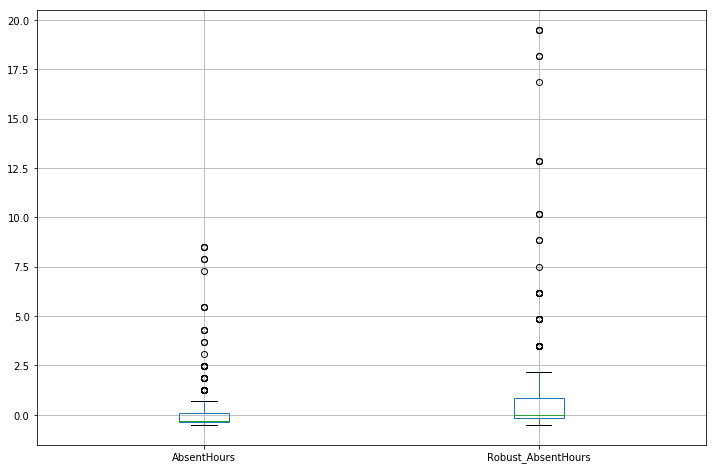

In [132]:
scaled_df.boxplot(column=['AbsentHours', 'Robust_AbsentHours'], figsize=(12, 8))

In [133]:
robust_scaled_df = pd.DataFrame(robust_scale(df), columns=df.columns)

In [134]:
robust_scaled_df.describe()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,-0.045312,0.106797,-0.063707,-0.061111,0.145319,-0.198243,0.704955,0.239575,0.654054
std,0.826571,0.436376,0.626410,0.719864,0.783827,0.644161,2.011665,0.612207,2.221833
min,-1.320988,-0.617647,-1.714286,-1.111111,-1.170620,-1.350000,-2.333333,-0.857143,-0.500000
25%,-0.567901,-0.294118,-0.571429,-0.666667,-0.398595,-0.700000,-0.333333,-0.142857,-0.166667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.432099,0.705882,0.428571,0.333333,0.601405,0.300000,0.666667,0.857143,0.833333
max,2.012346,0.764706,2.285714,2.333333,2.300522,1.250000,8.666667,1.857143,19.500000


In [138]:
robust_scaler = RobustScaler(copy=True, with_centering=True, with_scaling=True)

robust_scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

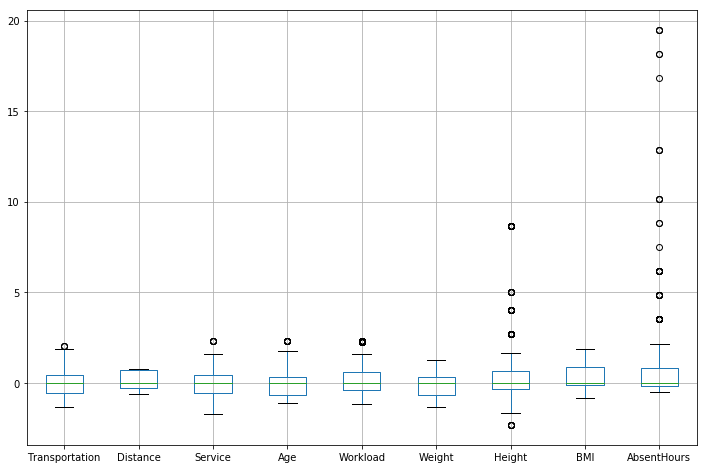

In [139]:
robust_scaled_array = robust_scaler.fit_transform(df)

robust_scaled_df = pd.DataFrame(robust_scaled_array, columns=df.columns)

robust_scaled_df.boxplot(figsize=(12, 8))

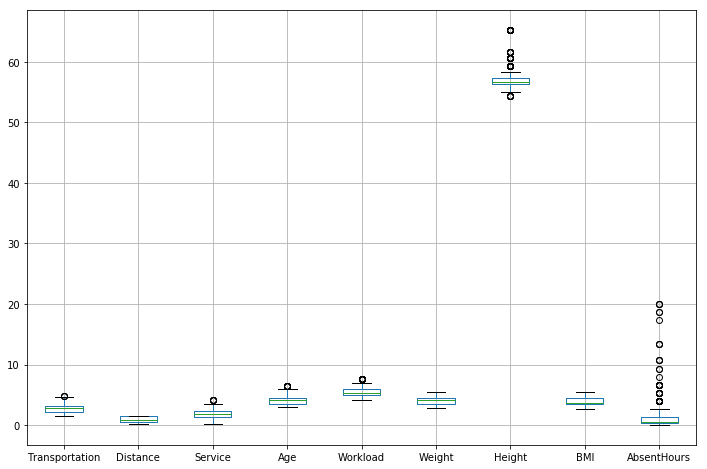

In [140]:
robust_scaler = RobustScaler(copy=True, with_centering=False, with_scaling=True)

robust_scaled_array = robust_scaler.fit_transform(df)

robust_scaled_df = pd.DataFrame(robust_scaled_array, columns=df.columns)

robust_scaled_df.boxplot(figsize=(12, 8))

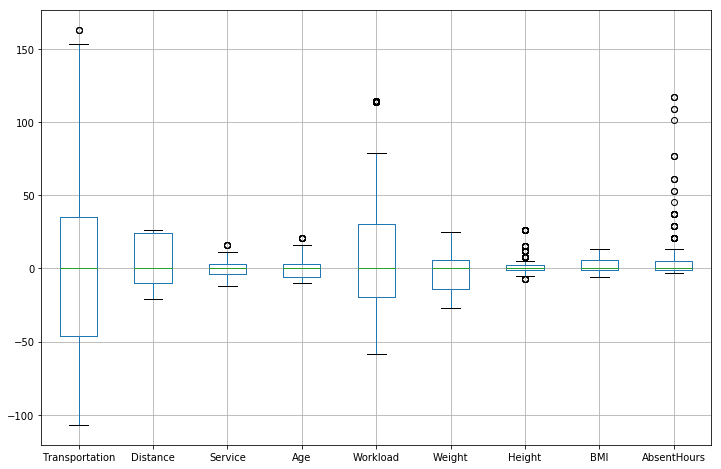

In [141]:
robust_scaler = RobustScaler(copy=True, with_centering=True, with_scaling=False)

robust_scaled_array = robust_scaler.fit_transform(df)

robust_scaled_df = pd.DataFrame(robust_scaled_array, columns=df.columns)

robust_scaled_df.boxplot(figsize=(12, 8))